# Install libraries

In [1]:
pip install catboost

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score


from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# load Data

In [3]:
df = pd.read_csv("/content/advertising.csv")

# Understanding the data

In [4]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [8]:
df.tail(2)

,TV,Radio,Newspaper,Sales
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [9]:
df.sample(2)

,TV,Radio,Newspaper,Sales
5,8.7,48.9,75.0,7.2
41,177.0,33.4,38.7,17.1


In [10]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


<Axes: >

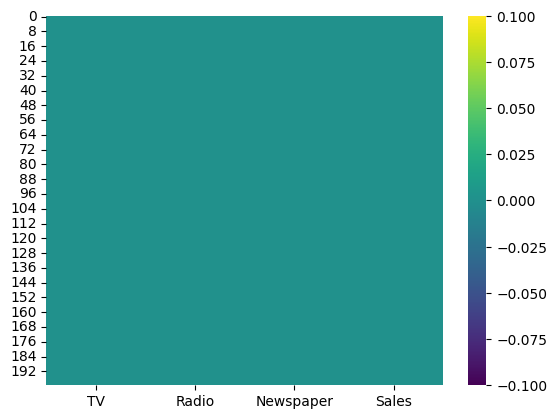

In [11]:
sns.heatmap(df.isnull(), cmap="viridis")

# data analysis

In [12]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
df.corr()['Sales']

,Sales
TV,0.901208
Radio,0.349631
Newspaper,0.157960
Sales,1.000000


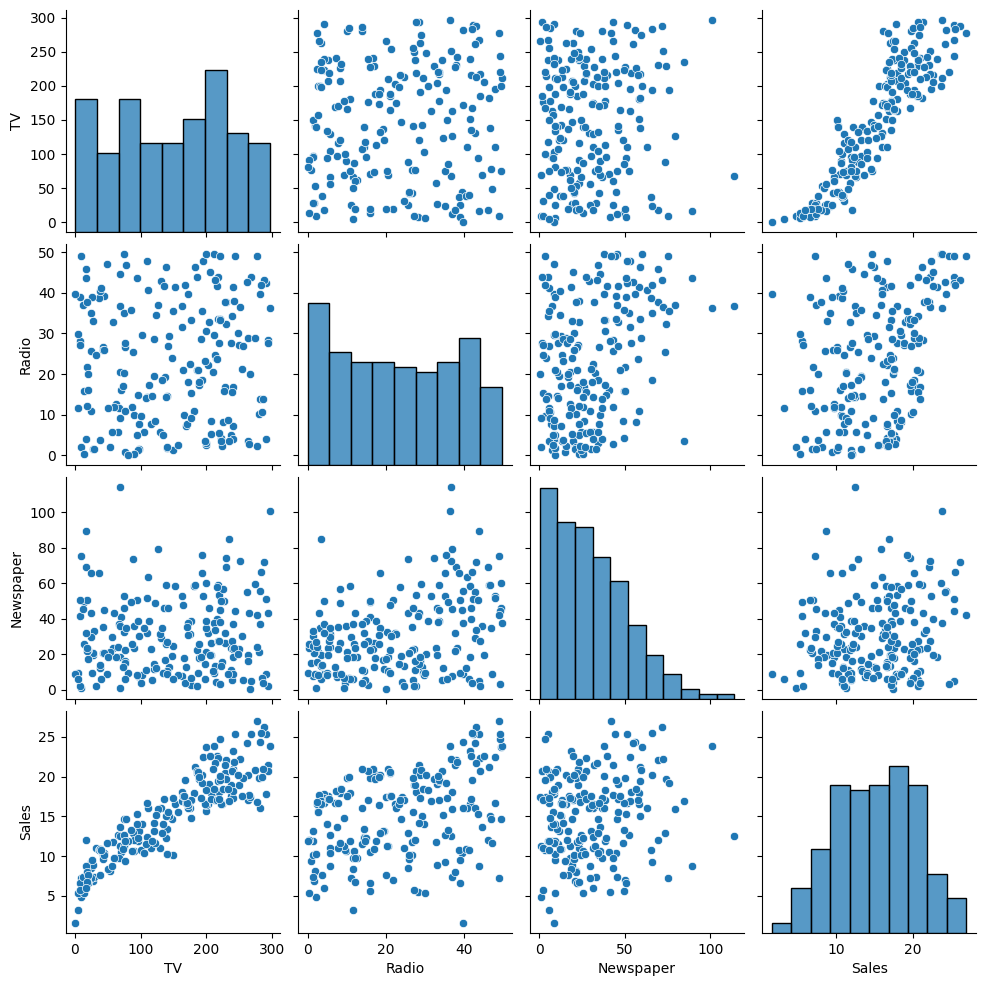

In [15]:
sns.pairplot(df)

<Axes: >

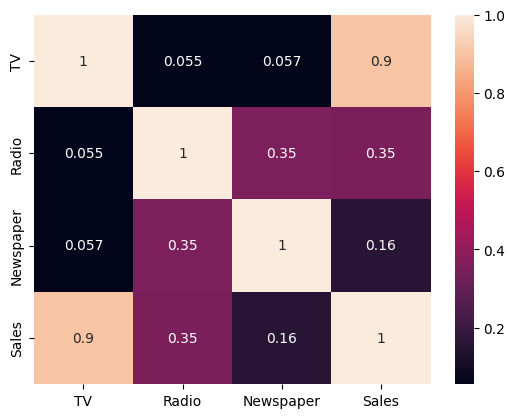

In [16]:
sns.heatmap(df.corr(), annot=True)

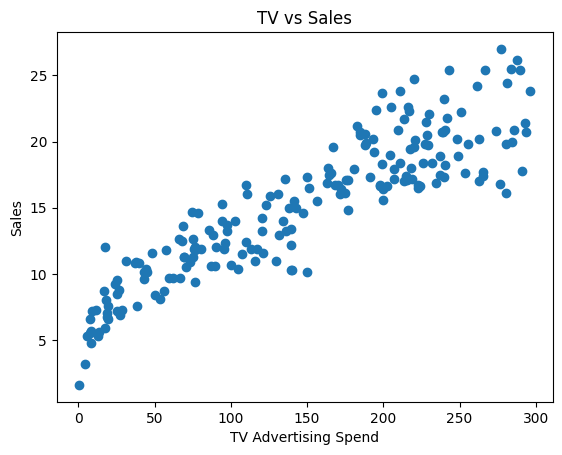

In [17]:
plt.scatter(df['TV'], df['Sales'])
plt.title('TV vs Sales')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.show()


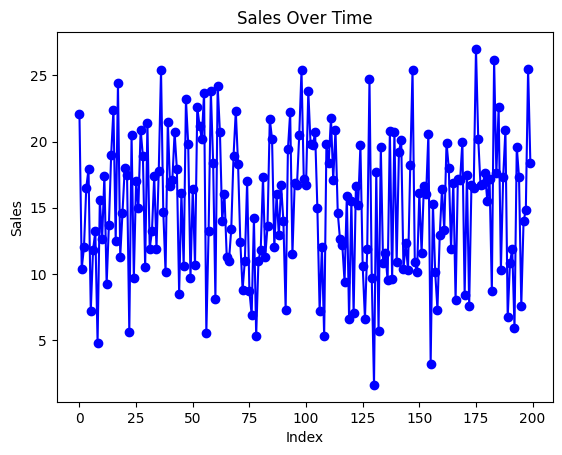

In [18]:
plt.plot(df['Sales'], color='blue', marker='o')
plt.title('Sales Over Time')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.show()


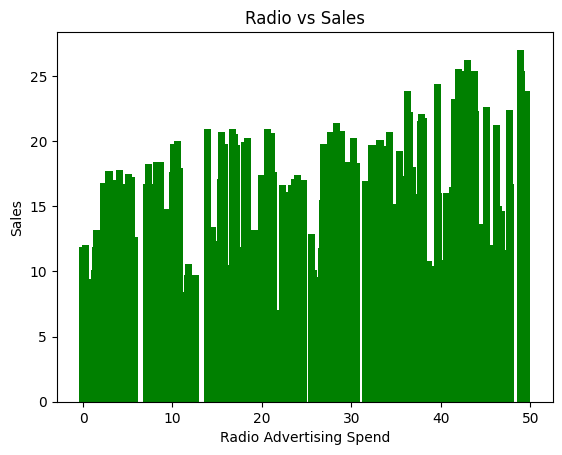

In [19]:
plt.bar(df['Radio'], df['Sales'], color='green')
plt.title('Radio vs Sales')
plt.xlabel('Radio Advertising Spend')
plt.ylabel('Sales')
plt.show()


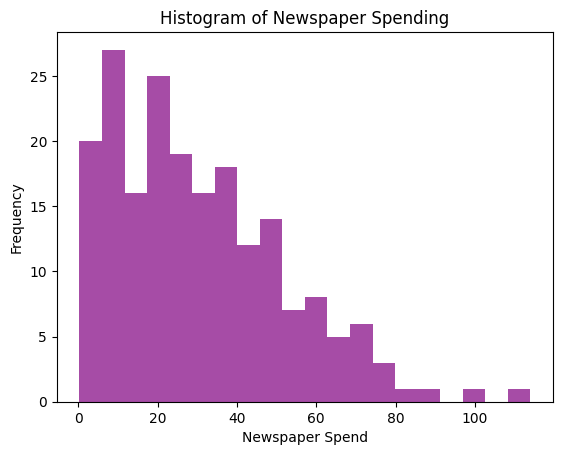

In [20]:
plt.hist(df['Newspaper'], bins=20, color='purple', alpha=0.7)
plt.title('Histogram of Newspaper Spending')
plt.xlabel('Newspaper Spend')
plt.ylabel('Frequency')
plt.show()


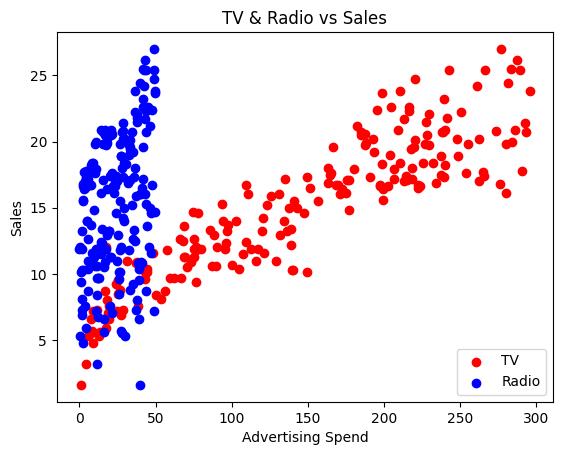

In [21]:
plt.scatter(df['TV'], df['Sales'], label='TV', color='red')
plt.scatter(df['Radio'], df['Sales'], label='Radio', color='blue')
plt.title('TV & Radio vs Sales')
plt.xlabel('Advertising Spend')
plt.ylabel('Sales')
plt.legend()
plt.show()


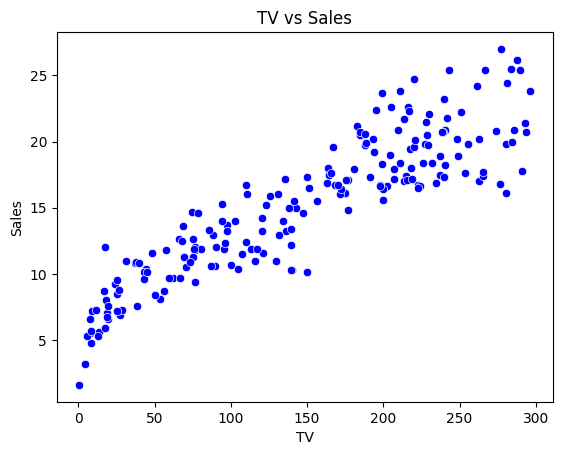

In [22]:
sns.scatterplot(x='TV', y='Sales', data=df, color='blue')
plt.title('TV vs Sales')
plt.show()


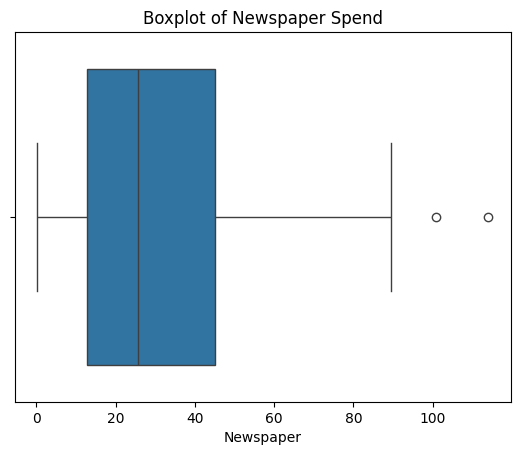

In [23]:
sns.boxplot(x='Newspaper', data=df)
plt.title('Boxplot of Newspaper Spend')
plt.show()


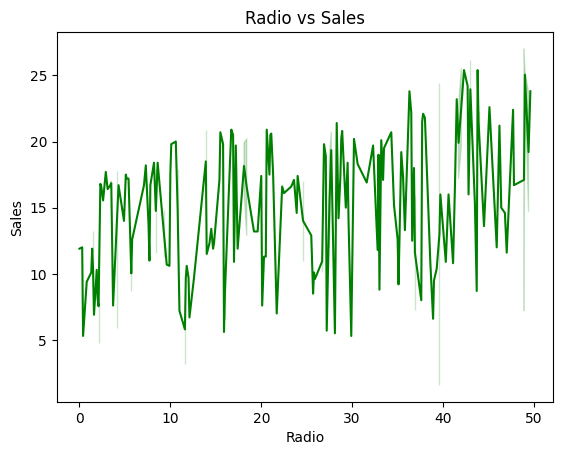

In [24]:
sns.lineplot(x='Radio', y='Sales', data=df, color='green')
plt.title('Radio vs Sales')
plt.show()


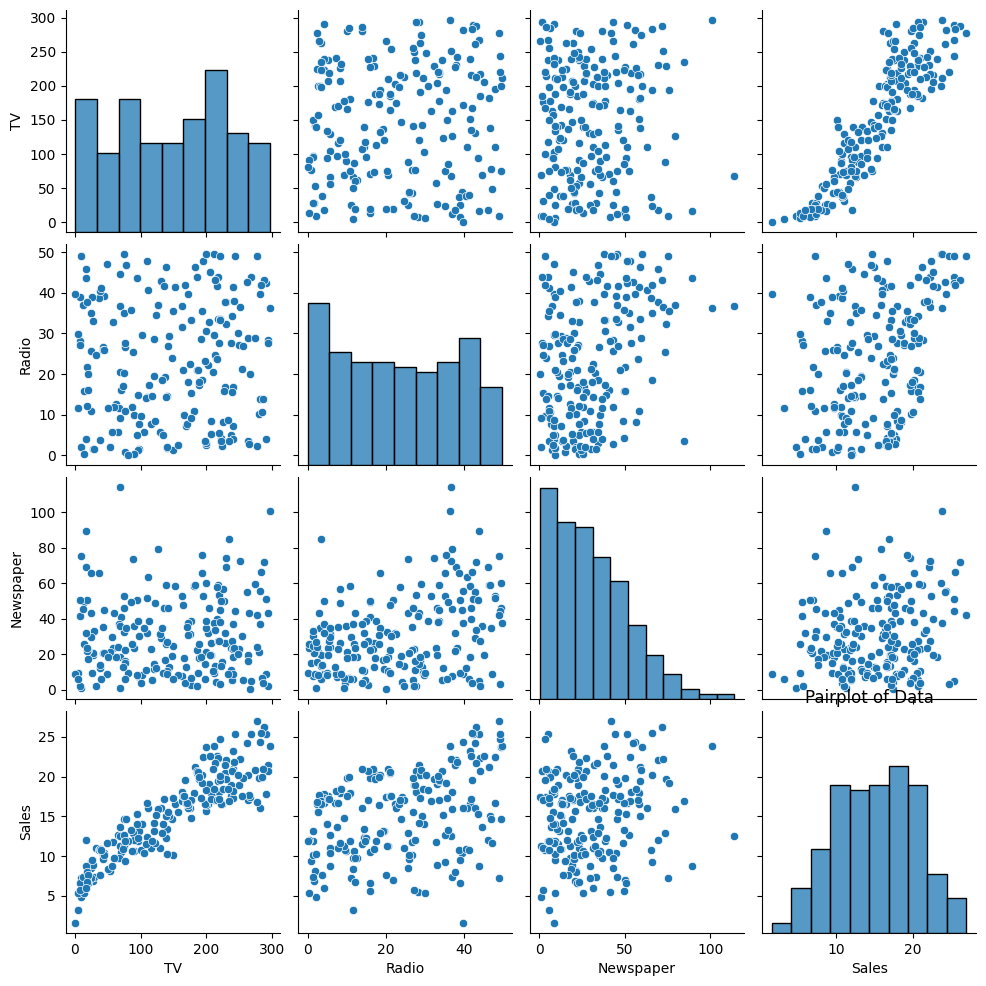

In [25]:
sns.pairplot(df)
plt.title('Pairplot of Data')
plt.show()


# Preparing data for a model

In [27]:
df = df.drop_duplicates()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [29]:
x = df.drop("Sales",axis = 1 )
y = df.Sales

In [30]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.30,shuffle=True,
                                      random_state=42)

# Create model

In [31]:
model1 = SVR()
model2 = RandomForestRegressor()
model3 = GradientBoostingRegressor()
model4 = LinearRegression()

model5 = XGBRegressor()
model6 = LGBMRegressor()
model7 = CatBoostRegressor(verbose=0)

In [33]:
results = []

def test(model, model_name):
    model.fit(xtrain, ytrain)
    predict = model.predict(xtest)
    mse = mean_squared_error(ytest, predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(ytest, predict)
    r1 = np.corrcoef(ytest, predict)[0, 1]
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")
    print(f"R1 Score: {r1}")
    print("-" * 30)
    results.append({
        "Model": model_name,
        "Mean Squared Error": mse,
        "RMSE": rmse,
        "R2 Score": r2,
        "R1 Score": r1
    })

test(model1, "Model 1")
test(model2, "Model 2")
test(model3, "Model 3")
test(model4, "Model 4")

results_df = pd.DataFrame(results)
results_df

Model: Model 1
Mean Squared Error: 3.823056677733101
RMSE: 1.9552638383944763
R2 Score: 0.8633430120188295
R1 Score: 0.9454393652547846
------------------------------
Model: Model 2
Mean Squared Error: 1.6143271333333353
RMSE: 1.2705617392843747
R2 Score: 0.942295105133408
R1 Score: 0.9747576936605465
------------------------------
Model: Model 3
Mean Squared Error: 1.7771630183550262
RMSE: 1.3331027786164975
R2 Score: 0.9364744586041739
R1 Score: 0.9718821992397954
------------------------------
Model: Model 4
Mean Squared Error: 2.541624036229147
RMSE: 1.5942471691143587
R2 Score: 0.9091484341849799
R1 Score: 0.9569122203228121
------------------------------


,Model,Mean Squared Error,RMSE,R2 Score,R1 Score
0,Model 1,3.823057,1.955264,0.863343,0.945439
1,Model 2,1.614327,1.270562,0.942295,0.974758
2,Model 3,1.777163,1.333103,0.936474,0.971882
3,Model 4,2.541624,1.594247,0.909148,0.956912


In [35]:
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'Training RMSE: {train_rmse:.2f}, R2: {train_r2:.2f}')
print(f'Testing RMSE: {test_rmse:.2f}, R2: {test_r2:.2f}')
if train_r2 > 0.9 and test_r2 < 0.7:
    print("There is a possibility of overfitting.")
else:
    print("The model seems balanced.")


Training RMSE: 0.48, R2: 0.99
Testing RMSE: 1.20, R2: 0.95
The model seems balanced.


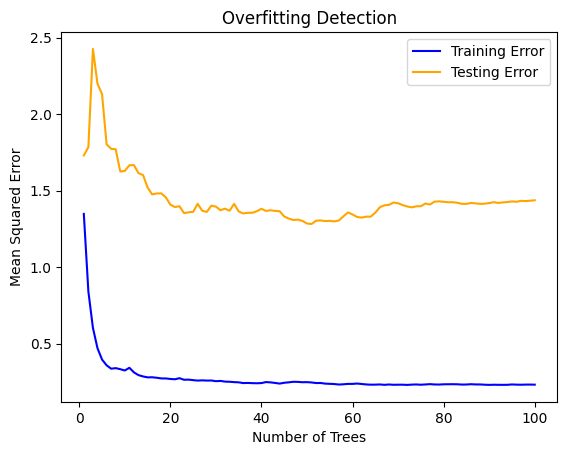

In [37]:
train_errors = []
test_errors = []
estimators = range(1, 101)

for n in estimators:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

plt.plot(estimators, train_errors, label='Training Error', color='blue')
plt.plot(estimators, test_errors, label='Testing Error', color='orange')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('Overfitting Detection')
plt.legend()
plt.show()


Number of Trees: 1, Training R2: 0.95, Testing R2: 0.94
Number of Trees: 2, Training R2: 0.97, Testing R2: 0.94
Number of Trees: 3, Training R2: 0.98, Testing R2: 0.92
Number of Trees: 4, Training R2: 0.98, Testing R2: 0.93
Number of Trees: 5, Training R2: 0.99, Testing R2: 0.93
Number of Trees: 6, Training R2: 0.99, Testing R2: 0.94
Number of Trees: 7, Training R2: 0.99, Testing R2: 0.94
Number of Trees: 8, Training R2: 0.99, Testing R2: 0.94
Number of Trees: 9, Training R2: 0.99, Testing R2: 0.95
Number of Trees: 10, Training R2: 0.99, Testing R2: 0.95
Number of Trees: 11, Training R2: 0.99, Testing R2: 0.95
Number of Trees: 12, Training R2: 0.99, Testing R2: 0.95
Number of Trees: 13, Training R2: 0.99, Testing R2: 0.95
Number of Trees: 14, Training R2: 0.99, Testing R2: 0.95
Number of Trees: 15, Training R2: 0.99, Testing R2: 0.95
Number of Trees: 16, Training R2: 0.99, Testing R2: 0.95
Number of Trees: 17, Training R2: 0.99, Testing R2: 0.95
Number of Trees: 18, Training R2: 0.99, 

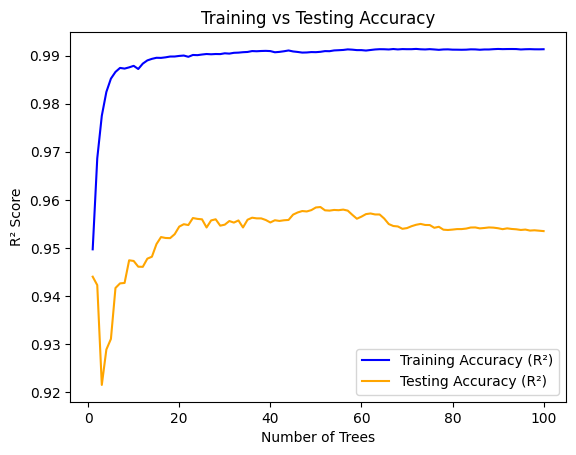

In [43]:
train_scores = []
test_scores = []
estimators = range(1, 101)

for n in estimators:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    train_r2 = r2_score(y_train, rf.predict(X_train))
    test_r2 = r2_score(y_test, rf.predict(X_test))
    train_scores.append(train_r2)
    test_scores.append(test_r2)
    print(f'Number of Trees: {n}, Training R2: {train_r2:.2f}, Testing R2: {test_r2:.2f}')

plt.plot(estimators, train_scores, label='Training Accuracy (R²)', color='blue')
plt.plot(estimators, test_scores, label='Testing Accuracy (R²)', color='orange')
plt.xlabel('Number of Trees')
plt.ylabel('R² Score')
plt.title('Training vs Testing Accuracy')
plt.legend()
plt.show()


# finally!